<a href="https://colab.research.google.com/github/felipetibarbosa/global-terror-predictor/blob/main/global_terror_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Classificação Precisa de Incidentes Terroristas: Identificando Padrões e Fatores de Risco

## 1.1 Sobre o Projeto

O projeto utiliza o Global Terrorism Database (GTD), acessível através do link: [Global Terroism Database](https://www.start.umd.edu/gtd/).

Este conjunto de dados contém informações sobre incidentes terroristas em todo o mundo desde 1970. Ele inclui características detalhadas como data, localização, grupo responsável, tipo de ataque, arma utilizada, entre outros. A base é extremamente rica, com mais de 200 mil registros e mais de 100 features, sendo uma excelente fonte para análise preditiva e classificação.

O objetivo deste projeto é desenvolver um sistema de classificação para identificar incidentes terroristas com base em características específicas, utilizando técnicas de machine learning para reconhecer padrões nos dados históricos.

![image.png](attachment:image.png)

## 1.2 Sobre a Base de Dados

**Global Terrorism Database (GTD)**

Este conjunto de dados contém mais de 200.000 incidentes, com informações detalhadas sobre o contexto do ataque, como a localização, o tipo de arma, o método do ataque, as vítimas, e os grupos terroristas envolvidos.

**Problema:** O projeto visa prever o tipo de ataque e identificar o grupo responsável, utilizando características como a localização, a arma utilizada e a data do incidente.

**Features a serem utilizadas:** Localização geográfica (latitude e longitude), data, tipo de ataque, tipo de arma, número de vítimas, grupo responsável. [Detalhes das Features](https://www.start.umd.edu/gtd/downloads/Codebook.pdf).



## 1.3 Explicando o Projeto

O projeto aborda a necessidade de prever e classificar incidentes terroristas com base em padrões históricos. Compreender os fatores que influenciam um ataque pode ajudar na alocação de recursos de segurança, antecipando possíveis ameaças.

A base de dados GTD oferece uma ampla gama de atributos que permitem identificar características recorrentes em ataques específicos. O objetivo é criar um modelo preditivo capaz de classificar novos incidentes terroristas com base em dados de eventos passados, utilizando técnicas como redes neurais, árvores de decisão ou ensemble learning.

O foco é em maximizar a precisão e minimizar falsos positivos, garantindo que o modelo seja útil para os responsáveis pela segurança pública e política de defesa.

## 1.4 Proposta

---

**Problema:** Como identificar padrões em ataques terroristas com base em dados históricos para prever o tipo de ataque e o grupo responsável?

**Features a serem utilizadas:** Localização, data, tipo de ataque, tipo de arma, número de vítimas, grupo responsável.

**A pergunta a ser respondida é:** Quais fatores influenciam o tipo de ataque e o grupo responsável por ele, e como podemos usar essas informações para prever futuros ataques com alta precisão?

# 2 - Metodologia CRISP-DM

CRISP-DM é um framework amplamente utilizado para Mineração de Dados que descreve uma abordagem estruturada para, planejamento, execução e avaliação da mineração de dados dos projetos. Esse framework fornece um passo a passo de processos que podem ser adaptados para várias áreas de negócio e tecnicas de mineração de dados, tornando-se uma ferramenta valiosa, para iniciantes e profissionais experientes.

Texto adaptado de: https://medium.com/@avikumart_/crisp-dm-framework-a-foundational-data-mining-process-model-86fe642da18c

---

![image.png](attachment:92f5a6f4-46e4-424a-a61d-02ff7db926b2.png)

Imagem retirada do slide: https://s2.smu.edu/~mhd/8331f03/crisp.pdf

## 2.1 Compreensão do Negócio

- **Objetivo:** Identificar o problema de segurança pública relacionado a ataques terroristas, visando prever o tipo de ataque e identificar padrões em grupos terroristas.

- **Tarefas**:
    - Compreender a importância da previsão de ataques para a segurança global.
    - Definir métricas, como precisão, recall e taxa de falsos positivos/negativos.

## 2.2 Entendimento dos Dados

- Objetivo: Coletar e entender as características dos dados do GTD.

- Tarefas:
    - Explorar o conjunto de dados GTD para identificar padrões e atributos relevantes.
    - Analisar a distribuição de atributos como localização, tipo de ataque e grupo responsável.

## 2.3 Preparação dos Dados

- Objetivo: Preparar os dados para a modelagem.

- Tarefas:
    - Limpar dados inconsistentes ou ausentes.
    - Realizar transformações de atributos, como converter datas e localizações em features relevantes.
    - Dividir os dados em conjuntos de treinamento, validação e teste.


## 2.4 Modelagem

- Objetivo: Desenvolver modelos preditivos utilizando algoritmos de machine learning.
- Tarefas:
    - Aplicar algoritmos de classificação (ex.: Random Forest, Redes Neurais, XGBoost) para prever o tipo de ataque.
    - Ajustar hiperparâmetros e comparar modelos para otimizar a performance.

## 2.5 Avaliação

- Objetivo: Avaliar a performance dos modelos utilizando métricas de classificação.
- Tarefas:
    - Avaliar precisão, recall, F1-score e ROC-AUC.
    - Comparar os resultados dos diferentes modelos e ajustar conforme necessário.

## 2.6 Implementação

- Objetivo: Implementar o modelo preditivo para uso prático.
- Tarefas:
    - Desenvolver um pipeline para classificar novos incidentes com base nos dados do GTD.
    - Documentar o processo e fornecer insights sobre possíveis melhorias.

# 3 - Execução do Projeto

## 3.1 Carregamento de Dependências e da Base de Dados

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached contourpy-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.53.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached kiwisolver-1.4.7-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
  Using cached pillow-10.4.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

In [ ]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
print(f'{df.shape[0]} Instancias.', end='\n')
print(f'{df.shape[1]} Features.')

209706 Instancias.
135 Features.


In [ ]:
pd.set_option('display.max_columns', None)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 729.8 MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,resolution,country,region,latitude,longitude,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,4861,209706.000000,209706.000000,205015.000000,205014.000000,...,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,2006-12-14 11:22:40.581978880,130.291351,7.279854,23.358696,30.416738,...,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1970-03-08 00:00:00,4.000000,1.000000,-53.154613,-176.176447,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,1997-05-22 00:00:00,69.000000,6.000000,11.510046,8.748117,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,2013-04-29 00:00:00,98.000000,8.000000,31.300213,43.746215,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,2016-05-10 00:00:00,160.000000,10.000000,34.557022,68.835918,...,3.420000e+05,0.000000e+00,6.640600e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,2021-05-29 00:00:00,1004.000000,12.000000,74.633553,179.366667,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,NaN,111.714562,2.905697,18.137061,56.113029,...,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966


In [ ]:
attack_per_year = df.groupby('iyear').size()
attack_per_year.count()

np.int64(50)

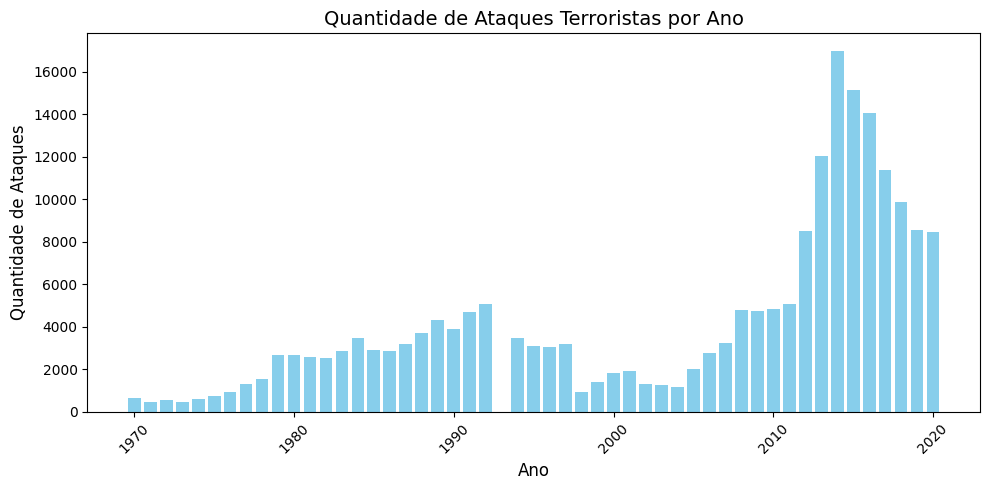

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(attack_per_year.index, attack_per_year.values, color='skyblue')
plt.title('Quantidade de Ataques Terroristas por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Ataques', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()